# Telecom customer churn prediction

Author: Militsa Ivanova <br>
SoftUni username:militsa082000 

## Why this topic?

Customer churn analysis is a crucial endeavor in the realm of business and technology. In today's highly competitive markets, retaining customers is often more cost-effective than acquiring new ones. Churn analysis allows companies to gain insights into why customers leave, enabling them to make data-driven decisions to reduce attrition rates. By understanding the underlying factors contributing to churn, businesses can implement targeted strategies to enhance customer satisfaction, improve product offerings, and ultimately, increase customer retention. In an age where customer loyalty is paramount, churn analysis is a valuable tool for optimizing business operations and sustaining long-term success.

#### Aims and objectives

With this project I will try answering some of the main questions that can help companies decide on their strategies on how to keep customers.
- What are the main 'clues' that can help us identify customer churn?
- Can we predict and prevent customer churn?
- How can we improve the models to predict churn better?


The dataset used for this project is Telco Customer Churn dataset from Kaggle.
Link to dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Literature review

B. Prabadevi [1] examines in their article 4 algorithms - KNN, Logistic regression, Random forest and Stochastic Gradinet Booster.The best algorithm was the Stochastic Gradient Booster with a score of 0.84. The article suggests making better preparations of the data and fine-tuning the algorithm's parameters to improve predictions. However, it doesn't talk about how to handle uneven data, which can make the predictions less trustworthy. Future studies need to look at this to make sure the predictions are fair and accurate.

In a different paper [2] the authors highlight that a combination of Random Forest and SMOTE-ENN (Synthetic Minority Over-sampling Technique - Edited Nearest Neighbours) provided the best results in their experiments, achieving up to 95% prediction accuracy based on the F1-score. They emphasize the importance of addressing class imbalance in datasets to improve the predictive performance of models. The paper suggests that future work should explore deep learning algorithms to further enhance churn prediction accuracy.

[1] B. Prabadevi, R. Shalini, B.R. Kavitha, Customer churning analysis using machine learning algorithms, International Journal of Intelligent Networks, Volume 4, 2023, Pages 145-154, ISSN 2666-6030, https://doi.org/10.1016/j.ijin.2023.05.005.
(https://www.sciencedirect.com/science/article/pii/S2666603023000143)
[2] R. Srinivasan, D. Rajeswari and G. Elangovan, "Customer Churn Prediction Using Machine Learning Approaches," 2023 International Conference on Artificial Intelligence and Knowledge Discovery in Concurrent Engineering (ICECONF), Chennai, India, 2023, pp. 1-6, doi: 10.1109/ICECONF57129.2023.10083813.

# Loading libraries and data

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score, accuracy_score, fbeta_score

In [138]:
dataframe = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data understanding

In [139]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [140]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [141]:
dataframe.shape

(7043, 21)

In [142]:
dataframe.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

So far we see that the columns are:
- customerID- column with unique values, it has too big entropia; we can remove it later
- gender- categorical values; Male/Female
- Senior Citizen- categorical values; 0 (not a senior) or 1 (senior)
- Partner- categorical values; Yes/No
- Dependents- categorical values; Yes/No
- tenure- number of months the customer has stayed with the company (int)
- PhoneService- whether the customer has a phone service or not; Yes/No
- MultipleLines- Yes/No/No phone service
- Internet Service- customer's internet service provider- DSL/ Fiber optic/ No
- Online Security- Yes/No/ No internet service
- OnlineBackup- Yes/No/No internet service
- DeviceProtection- Yes/No/No internet service
- TechSupport -whether the customer has tech support or not; Yes/No/No internet service
- StreamingTV- Yes/No/No internet service
- StreamingMovies- Yes/No/No internet service
- Contract- the contract term of the customer; Month-to-month/ One year/ Two years
- PaperlessBilling- Yes/No
- PaymentMethod- Electronic check/ Mailed check/ Bank transfer (automatic)/ Credit card (automatic)
- MonthlyCharges- the amount charged to the customer monthly (float)
- TotalCharges- the The total amount charged to the customer <b>(has to be float but it's a type object, maybe there are problem values)</b>
- Churn- the target variable; Yes/No

Most of the columns include categorical information. From the data types we can see that the TotalCharges column is type object. It has to be converted to a num data type. When converting, I will replace any problematic values with NaN and later identify them.


In [143]:
nan_rows=dataframe[pd.to_numeric(dataframe['TotalCharges'], errors='coerce').isna()]
print(nan_rows)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

There are 11 rows with NaN values. As they are not that many and they won't significantly impact my dataset (they are non-churn values), I choose to remove those rows.

In [144]:
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'], errors='coerce')
dataframe =dataframe.dropna(subset =['TotalCharges'])

print(dataframe.isnull().sum())
print(dataframe.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [145]:
dataframe.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now I will remove the customerID column as this column doesn't provide any meaningful information for the model

In [146]:
dataframe=dataframe.drop(columns=['customerID'])

Let's proceed with the categorial values next. I choose to use One-Hot Encoding because this categorical data doesn't really have a meaningful order (nominal data).

In [147]:
dataframe_copy=dataframe.copy()

In [148]:

#first identifying the categorical variables
categorical_cols = dataframe_copy.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn') #Let's not forget to remove the target variable!!!!!


In [149]:
df_encoded=pd.get_dummies(dataframe_copy, columns=categorical_cols)*1
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Data visualization

For churn analysis, it's essential to visualize and understand the relationships between different features and the target variable (Churn).

Churn
No     5163
Yes    1869
Name: count, dtype: int64


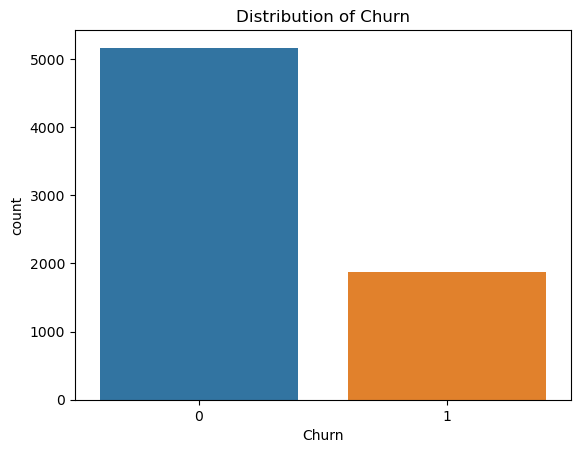

In [150]:
churn_count=dataframe['Churn'].value_counts()
print(churn_count)
sns.countplot(x='Churn', data=df_encoded)
plt.title('Distribution of Churn')
plt.show()

As we can see from this count plot, there are much less churn customer values in the dataset. This should be taken into account when training the models later.

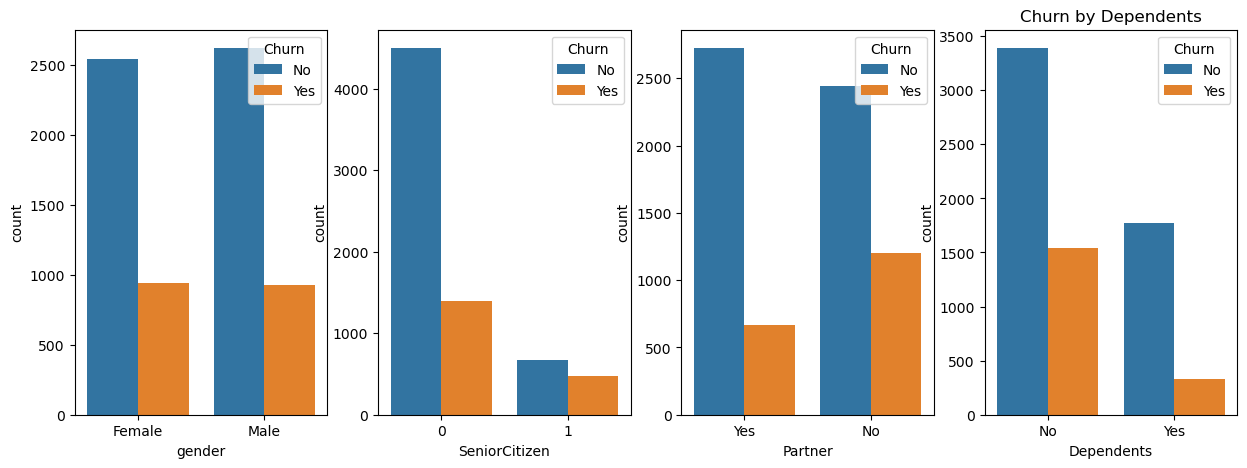

In [151]:
fig, axs = plt.subplots(ncols=4, figsize=(15, 5))
dataframe_cols =['gender', 'SeniorCitizen','Partner','Dependents']
for col in dataframe_cols:
    index=dataframe_cols.index(col)
    sns.countplot(x=col, hue="Churn",data=dataframe, ax=axs[index])
    plt.title(f"Churn by {col}")

From those graphs we can see that there is no difference in churn rates between men and women, but there is difference when the people are seniors, singles or don't have dependents.

Text(0.5, 1.0, 'Total Charges Distribution')

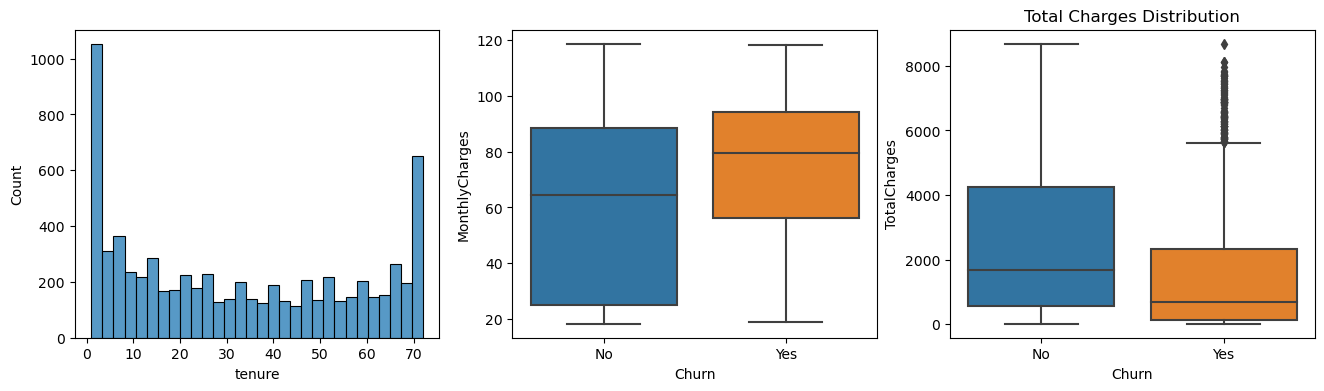

In [152]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 4))

sns.histplot(data=dataframe, x='tenure', bins=30, kde=False,ax=axs[0])
plt.title('Tenure Distribution')

sns.boxplot(data=dataframe, x='Churn', y='MonthlyCharges', ax=axs[1])
plt.title('Monthly Charges Distribution')

sns.boxplot(data=dataframe, x='Churn', y='TotalCharges' ,ax=axs[2])
plt.title('Total Charges Distribution')

<p>From the first histogram we can see that there are a lot of customers who have been with the company for about 1-2 months and for 72 months. It's important to note here that there are different kinds of contracts, so we have to further inspect what the distribution of the different contract types is.</p> <br>
   <p> From the boxplots we notice some interesting phenomenons- the median monthly charge for churn customers is higher than the one for non-churn customers. The IQR (a measure of the spread of the data) for this group is narrower and higher, ranging from around 60 to nearly 90, indicating that customers who churn tend to pay higher monthly charges. This could suggest that pricing is a factor in the decision to churn.</p> <br>
   <p> On the other hand though, we see from the second boxplot that the IQR of churn customers is much narrower, suggesting that customers who churn have generally been with the company for a shorter amount of time or have lower total spending. There are many outliers for this group, especially in the higher range, which could represent customers who've been with the company for a long time or had high expenditures but still decided to churn. Customers who churn tend to have a lower total expenditure with the company. The presence of outliers in the 'Yes' category suggests that even some high-spending or long-term customers are churning.</p>

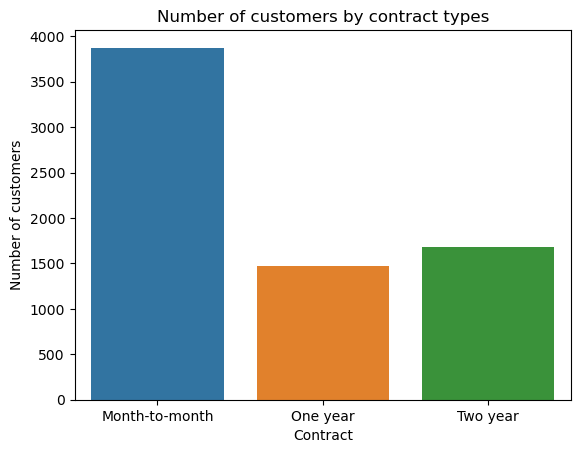

In [153]:
sns.countplot(x='Contract',data=dataframe).set_ylabel('Number of customers')
plt.title(f"Number of customers by contract types")
plt.show()

As we can see, most of the customers have a month-to-month contracts. Maybe this could be the reason for so many churning customers after the first couple of months? Now let's see for how long has each group stayed with the company.

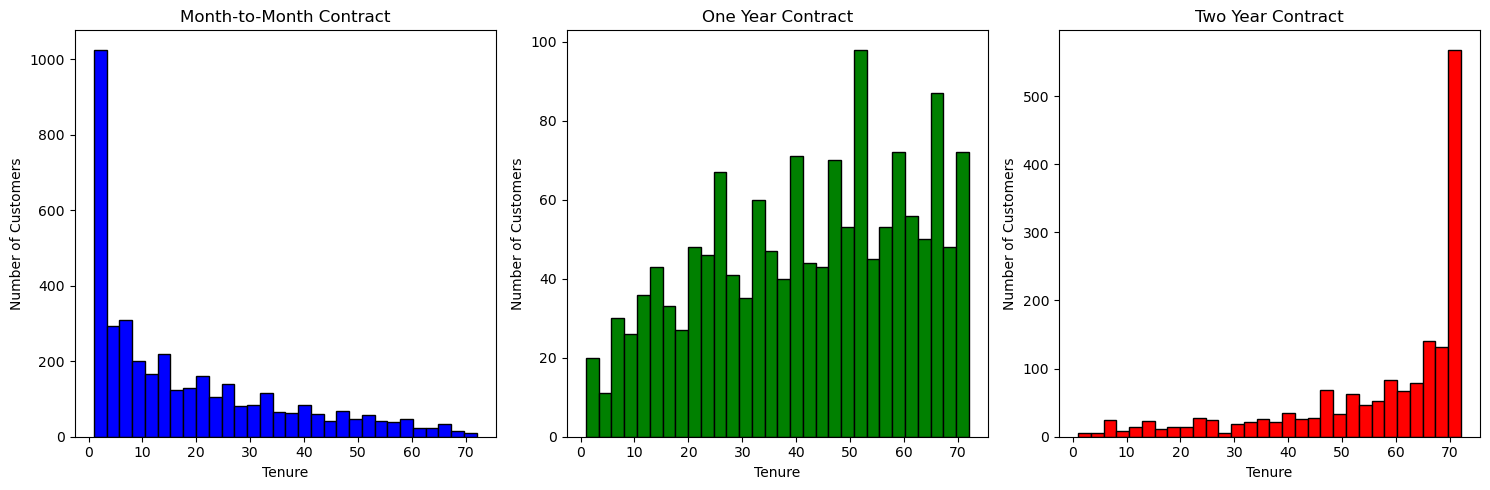

In [154]:
month_to_month = dataframe[dataframe['Contract'] == 'Month-to-month']['tenure']
one_year = dataframe[dataframe['Contract'] == 'One year']['tenure']
two_year = dataframe[dataframe['Contract'] == 'Two year']['tenure']

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(month_to_month, bins=30, color='blue', edgecolor='black')
plt.title('Month-to-Month Contract')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
plt.hist(one_year, bins=30, color='green', edgecolor='black')
plt.title('One Year Contract')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 3)
plt.hist(two_year, bins=30, color='red', edgecolor='black')
plt.title('Two Year Contract')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

Note: we have different scaling on the y axis of those graphs. For better understanding, we can combine them on a single graph and compare them directly:

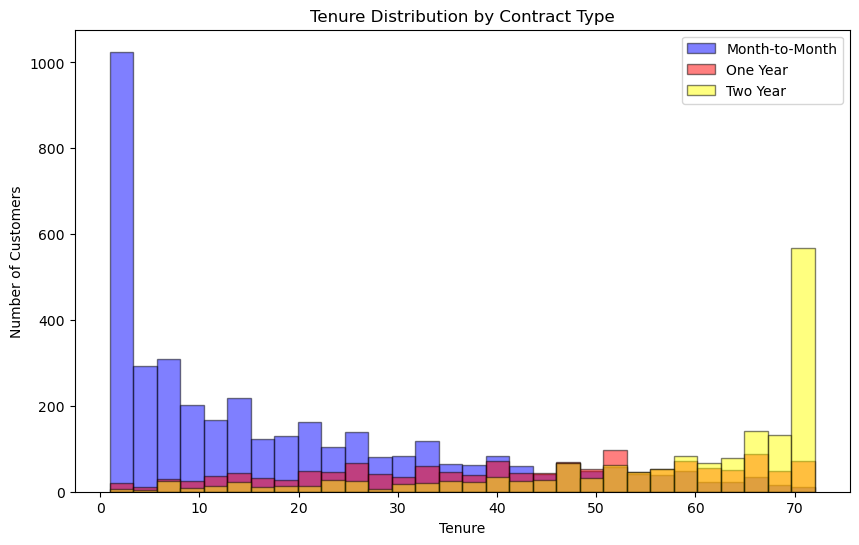

In [155]:
plt.figure(figsize=(10,6))

plt.hist(month_to_month, bins=30, alpha=0.5, label='Month-to-Month', color='blue', edgecolor='black')
plt.hist(one_year, bins=30, alpha=0.5, label='One Year', color='red', edgecolor='black')
plt.hist(two_year, bins=30, alpha=0.5, label='Two Year', color='yellow', edgecolor='black')

plt.title('Tenure Distribution by Contract Type')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend(loc='upper right')

plt.show()

As suspected, the monthly contracts last for only a couple of months, while most of the two-year contracts last for more than 6 years!  
<p> This could mean that customers who have longer cotracts could be more loyal to the company and are expected to stay for a longer period of time. </p>
<p> Let's inspect this further and see how many customers from each contract type have churned. </p>

Text(0.5, 1.0, 'Churn by contract type')

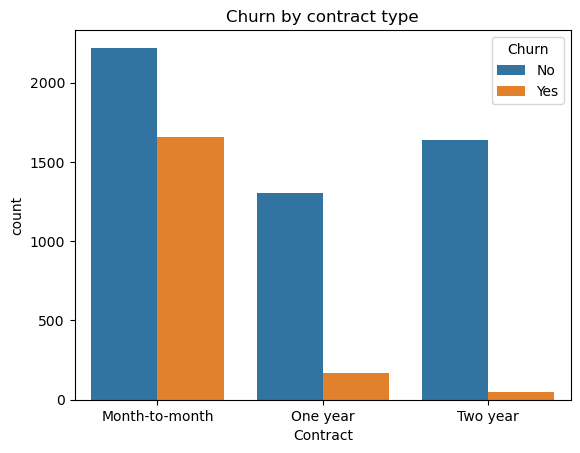

In [156]:
sns.countplot(x='Contract', hue="Churn",data=dataframe)
plt.title(f"Churn by contract type")

Once again we can see that most of the customers, who have month-to-month contracts, tend to churn, while customers with longer contracts are more loyal.

Now let's see the tenure distribution of churned customers.

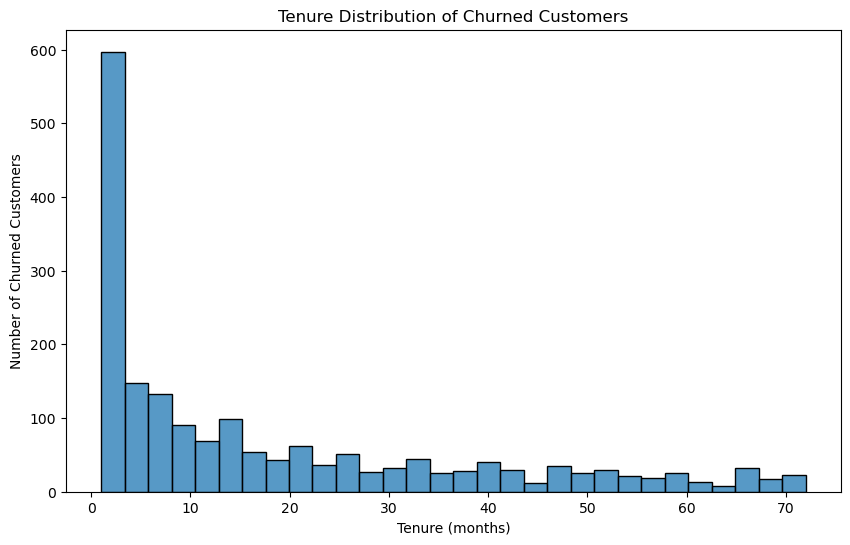

In [157]:
churned_customers = dataframe[dataframe['Churn'] == 'Yes']

plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['tenure'], bins=30)
plt.title('Tenure Distribution of Churned Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Churned Customers')
plt.show()

Once again it's clear that customers who stay longer with the company are less likely to churn and vice virsa. 
<p>The high churn rate among new customers suggests that early intervention strategies could be beneficial. This might include improved onboarding processes, initial discounts, enhanced customer support in the early stages, or feedback collection to understand and address issues faced by new customers.</p>
<p>The lower churn in long-term customers highlights the importance of retention strategies targeted at customers who have been with the company for intermediate durations. They have already overcome the initial churn risk but are not yet in the highly loyal bracket.</p>

Now, let's see if the payment method has anything to do  with the churn rate.

Text(0.5, 1.0, 'Churn by contract type')

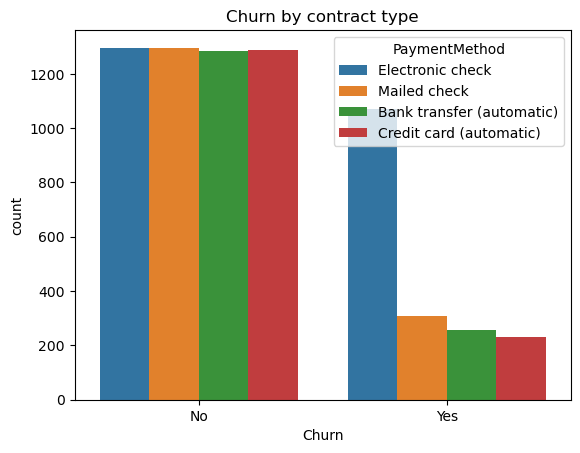

In [158]:
sns.countplot(x='Churn', hue="PaymentMethod",data=dataframe)
plt.title(f"Churn by contract type")

Interestingly, most of the customers, who have churned, have chosen Electronic check as a payment method.

### Heatmap for correlation

Next, let's visualize the correlation between the variables to find which features are most related to churn.

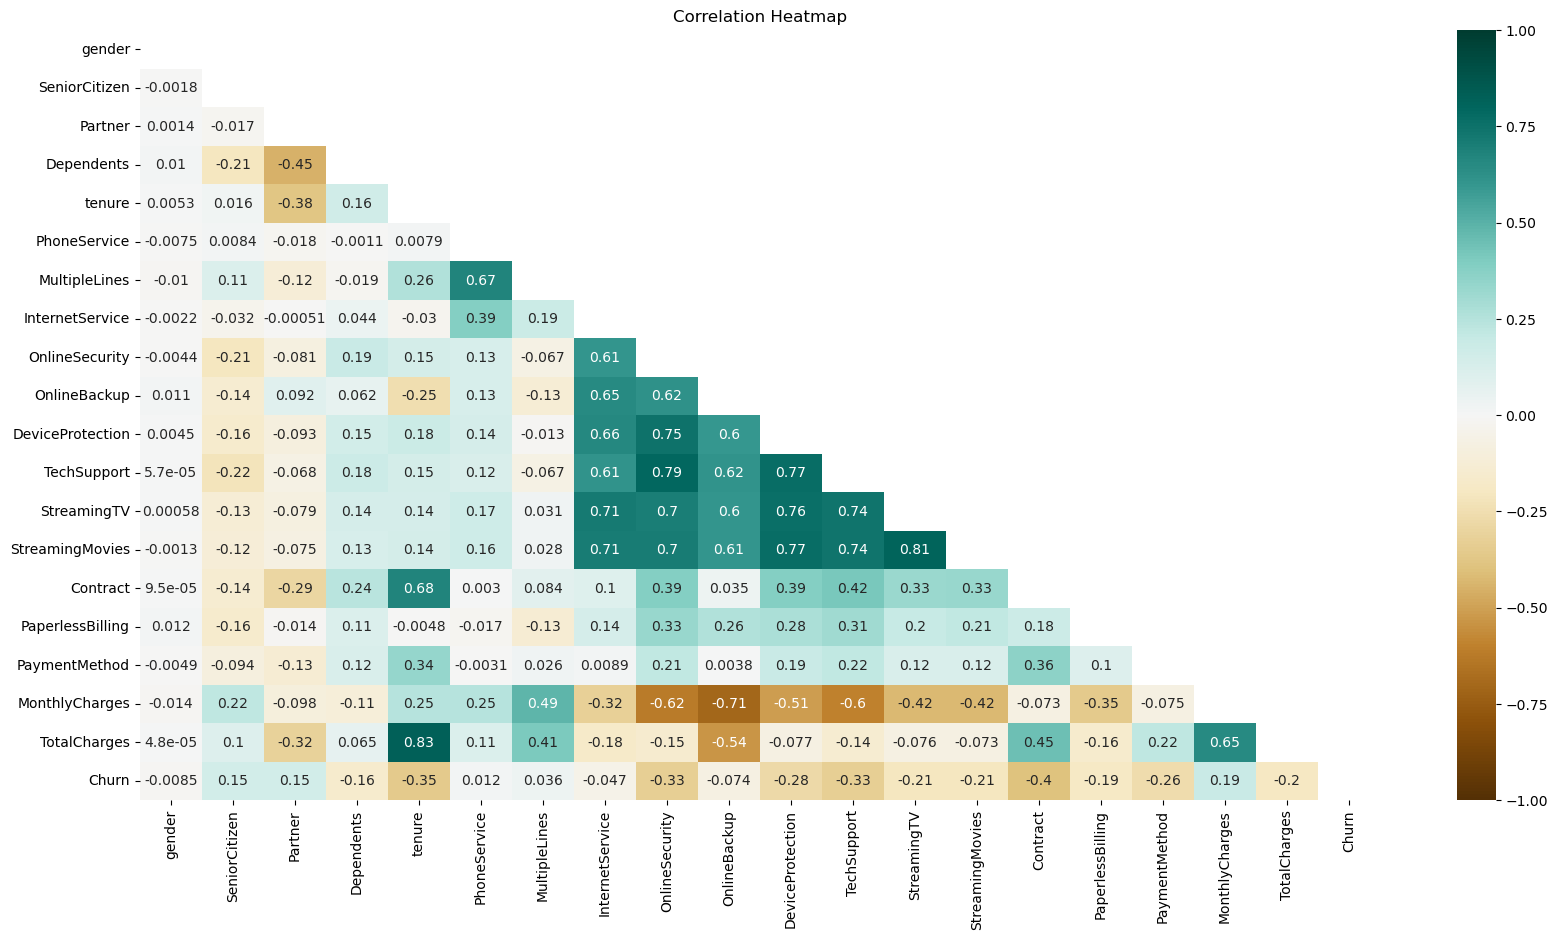

In [159]:
categorical_cols = dataframe.select_dtypes(include=['object']).columns.tolist()

# Factorize only the categorical columns
for col in categorical_cols:
    dataframe_copy[col] = pd.factorize(dataframe_copy[col])[0]


plt.figure(figsize=(20, 10))
corr = dataframe_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr,mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

### Key observations:

1. High Positive Correlation:

- OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport have strong positive correlations with each other, with values ranging from around 0.6 to 0.8. This suggests that customers who have one of these services are likely to have the others as well.
- StreamingTV and StreamingMovies have a correlation of 0.81, indicating that customers who stream TV are also very likely to stream movies.
- Contract and tenure also have strong positive correlations (0.67). This suggest that customers who have a longer contract is more likely to stay for a longer period of time with the company.
- TotalCharges and Contract show a correlation of 0.45, This indicates a moderate positive relationship. It suggests that as the duration of the contract increases (from month-to-month to one year to two years), the total charges tend to increase as well. 

2. Negative Correlation:

- Monthly charges have negative correlation with the services Online security, Online Backup, Device protection and Tech support. Customers who use these services are more likely to pay less on average for their monthly charges compared to those who don't have these services. Potential reasons for this could be bundling discounts, older plans, different customer segments and other.

3. Churn correlations:
- Tenure has a negative correlation with Churn (-0.35). This suggests that the longer a customer has been with the company, the less likely they are to churn. The same goes for customers who use the Online security, Device Protection as well as the Tech support services.  
- Contract has a negative correlation with Churn (-0.4). Longer contracts might be associated with a decreased likelihood of churn.
- MonthlyCharges has a positive correlation with Churn (0.19), indicating that higher monthly charges might be associated with a higher likelihood of churn.


For the purposes of choosing between the StandardScaler and the MinMaxScaler, I want to further explore the numerical data in the columns 'tenure', 'MonthlyCharges' and 'TotalCharges'.

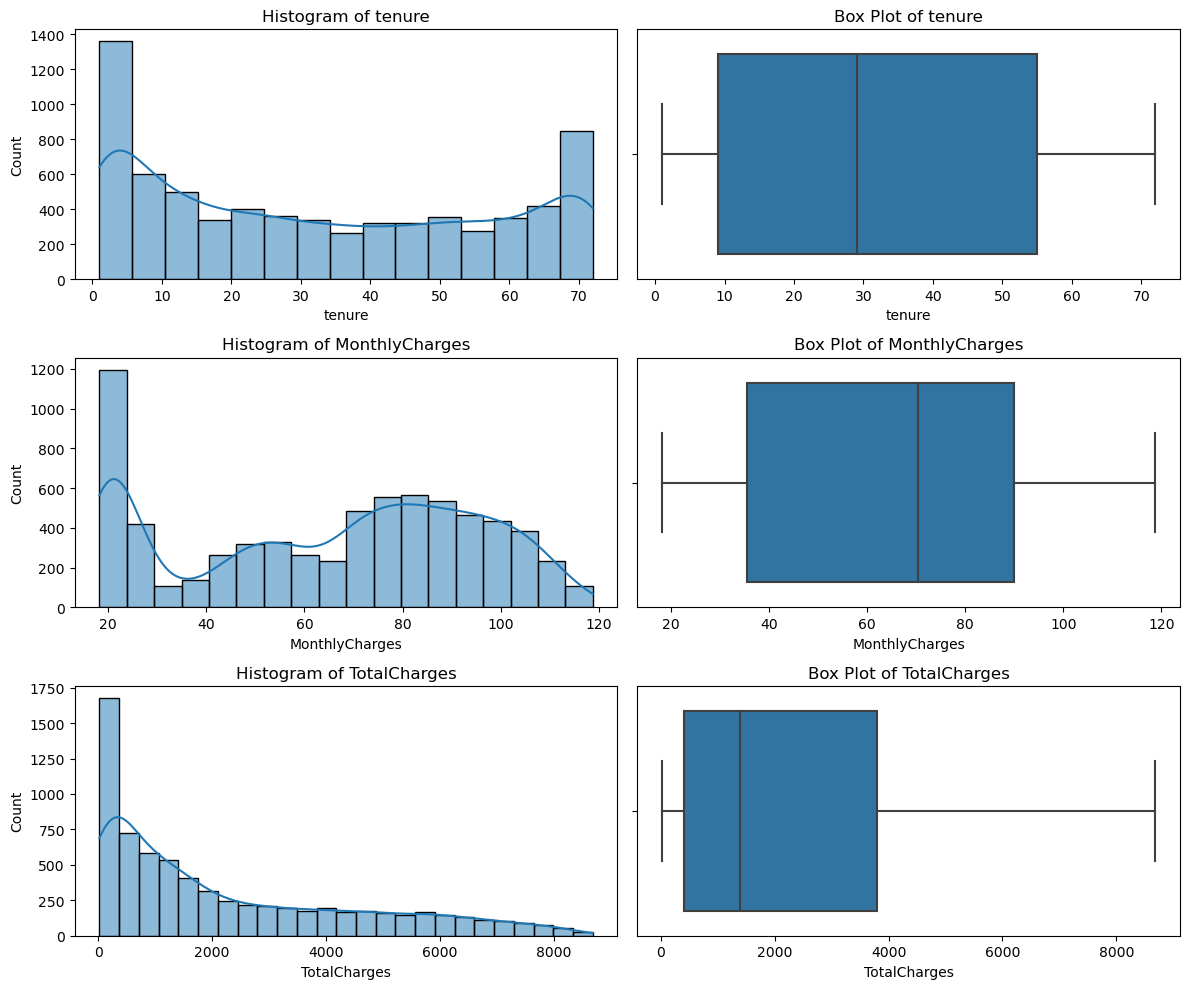

In [160]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Plotting histograms and box plots
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 10))

for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(dataframe[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    
    # Box Plot
    sns.boxplot(x=dataframe[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

Analysis

1. Tenure:

<p>The distribution appears bimodal, with significant peaks at lower and higher tenure values, indicating a substantial number of new customers and a similarly large group of long-term customers.
The box plot shows a fairly even spread across quartiles, with no extreme outliers.</p>

2. MonthlyCharges:

<p>This shows a somewhat bimodal distribution, with a group of customers paying lower monthly charges and another group at higher charges.
The box plot indicates a wide range of monthly charges with the median around the middle of the range. There are no significant outliers. </p>

3. TotalCharges:

<p>The distribution is right-skewed, indicating that most customers have lower total charges, but there's a long tail of customers with higher total charges.
The box plot shows this skewness with a median that is not centrally located and a number of high-value outliers.</p>

# Data Preprocessing

Now that we have a general understanding of the data and what features could possibly play an important role in the modeling process, it's time to further prepare our data.

#### Split in train and test data

In [161]:
x = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 50)


#### Data scaling

- 'Tenure' and 'MonthlyCharges' do not exhibit extreme skewness or outliers, making StandardScaler a good choice.
- 'TotalCharges' is right-skewed with outliers, which reinforces the choice of StandardScaler.


<p>I will fit the scaler only on the training set in order to avoid information leakage from the test set during model training.</p>

In [162]:
scaler= StandardScaler()
scaler.fit(x_train[numerical_cols])

StandardScaler()

In [163]:
#Train set
x_train_scaled = x_train.copy()
x_train_scaled[numerical_cols] = scaler.transform(x_train[numerical_cols])

#Test set
x_test_scaled = x_test.copy()
x_test_scaled[numerical_cols] = scaler.transform(x_test[numerical_cols])

# Model prediction and evaluation

In [164]:
# Creating two dictionaries to store the results there
models_no_param={}
models_with_param={}

## Logistic regression

In [165]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled,y_train)

LogisticRegression()

### Evaluation

In [169]:
prediction=lr_model.predict(x_test_scaled)
report=classification_report(y_test,prediction)
print(report)
print('Score (training data):',lr_model.score(x_train_scaled,y_train))
print('Score (testing data):',lr_model.score(x_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1561
           1       0.66      0.58      0.61       549

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110

Score (training data): 0.8033319788703779
Score (testing data): 0.8118483412322275


In [170]:
models_no_param['lr_model']=[]
models_no_param['lr_model'].append(lr_model.score(x_test_scaled,y_test))
models_no_param['lr_model'].append(recall_score(y_test, prediction))
models_no_param['lr_model'].append(precision_score(y_test, prediction))

## Random forest

In [171]:
rf_model=RandomForestClassifier(random_state = 42)
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Evaluation

In [173]:
rf_prediction = rf_model.predict(x_test_scaled)
rf_report=classification_report(y_test, rf_prediction)
print(rf_report)
print('Score (training data):',rf_model.score(x_train_scaled,y_train))
print('Score (testing data):',rf_model.score(x_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1561
           1       0.62      0.50      0.56       549

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Score (training data): 0.9969524583502641
Score (testing data): 0.7919431279620853


Looks like the Random Forest algorthm tends to overfit the data.

In [174]:
models_no_param['rf_model']=[]
models_no_param['rf_model'].append(rf_model.score(x_test_scaled,y_test))
models_no_param['rf_model'].append(recall_score(y_test, rf_prediction))
models_no_param['rf_model'].append(precision_score(y_test, rf_prediction))

## Support vector machines (SVM)

In [175]:
svm_model= SVC(kernel='rbf', C=1,random_state=42)
svm_model.fit(x_train_scaled,y_train)

SVC(C=1, random_state=42)

### Evaluation

In [177]:
svm_prediction=svm_model.predict(x_test_scaled)
svm_report=classification_report(y_test, svm_prediction)
print(svm_report)
print('Score (training data):',svm_model.score(x_train_scaled,y_train))
print('Score (testing data):',rf_model.score(x_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1561
           1       0.68      0.50      0.58       549

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110

Score (training data): 0.8171475010158472
Score (testing data): 0.7919431279620853


In [178]:
models_no_param['svm_model']=[]
models_no_param['svm_model'].append(svm_model.score(x_test_scaled,y_test))
models_no_param['svm_model'].append(recall_score(y_test, svm_prediction))
models_no_param['svm_model'].append(precision_score(y_test, svm_prediction))
models_no_param

{'lr_model': [0.8118483412322275, 0.5774134790528234, 0.6576763485477178],
 'rf_model': [0.7919431279620853, 0.5027322404371585, 0.6244343891402715],
 'svm_model': [0.8099526066350711, 0.5045537340619308, 0.6822660098522167]}

As we can see from the initial modelling reports there are really low recall and f1-scores for the churn class (class 1). This is because the data is imbalanced- there are too many non-churn samples in comparison to churn ones. Let's try to solve this problem by trying different techniques such as fine-tuning the models' parameters, SMOTE and altering the class weights.

When choosing the models' params I need to decide which metric to focus on.
And here we stumble upon a dilemma: Do we want a model that has an overall better prediction ability (high accuracy) or such that can correctly identify as many true churn cases as possible (true positives, high recall). 
Considering the business context and the cost of potentially losing a customer vs. the cost of preventing a customer to churn, I think that maybe it's better to have 'false alarms' (customers who we predict are going to churn, but they won't) than failing to identify churn.

When it comes to deciding whether to focus on recall or accuracy and precision in predicting customer churn, it really depends on what the business thinks is more important. If a business decides that they really don't want to lose any customers, they might choose to have a higher recall. This means they're okay with sometimes thinking a customer will leave when they actually won't. This could be because they feel that losing a customer is more expensive than the extra cost of keeping someone who wasn't going to leave anyway. On the other hand, if a business doesn't want to spend too much on customers who aren't really at risk of leaving, they might opt for higher accuracy and precision to avoid these false alarms. It's a bit like deciding whether it's worse to have a few extra umbrellas you don't need or to get caught in the rain without one.

For my research, I decide to use F-beta score as a metric in grid search. Using the F-beta score instead of just recall for grid search offers a more <b> balanced </b> view of the model's performance. Recall focuses only on how well the model identifies true positives (actual churn cases), but it doesn't consider false positives (customers who are not churning but are predicted to). In a business context, this means making sure the model doesn't waste resources on customers who are not at risk of churning while still accurately identifying those who are. In summary, using the F-beta score helps in building a model that is both effective in identifying churn and efficient in its predictions.

Nevertheless I think our primary goal is to minimize false negatives (missing out on identifiying churn cases). That's why for the beta value in the F-beta score I will chose beta=2. This means that recall is considered twice as important as precision. This value could be further adjusted based on how much the business wants to emphasize recall over precision.

# Fine-tuning the models

# LG

In [41]:
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 3, 5, 7],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight':['balanced']
}

In [42]:
recall_scorer = make_scorer(fbeta_score, beta=2)

In [43]:
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), logreg_param_grid, cv=5, scoring=recall_scorer)
logreg_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 3, 5, 7],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring=make_scorer(fbeta_score, beta=2))

In [44]:
best_logreg_params = logreg_grid.best_params_
best_logreg_score = logreg_grid.best_score_
print(best_logreg_params)
print(best_logreg_score)

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
0.7233368065483811


In [45]:
prediction=logreg_grid.predict(x_test_scaled)
report=classification_report(y_test,prediction)
print(report)
print('F-beta score (training data):',logreg_grid.score(x_train_scaled,y_train))
print('F-beta score (testing data):',logreg_grid.score(x_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1561
           1       0.50      0.81      0.62       549

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110

F-beta score (training data): 0.7242702480471427
F-beta score (testing data): 0.7170668397144712


In [46]:
models_with_param['lr_model']=[]
models_with_param['lr_model'].append(accuracy_score(y_test,prediction))
models_with_param['lr_model'].append(recall_score(y_test, prediction))
models_with_param['lr_model'].append(precision_score(y_test, prediction))

# RF

In [47]:
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [48]:
# Grid search with cross-validation
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring=recall_scorer)
rf_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100, 200]},
             scoring=make_scorer(fbeta_score, beta=2))

In [49]:
# Get best parameters and score
best_rf_params = rf_grid.best_params_
best_rf_score = rf_grid.best_score_
print(best_rf_params)
print(best_rf_score)

{'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 10}
0.6628244961125855


In [180]:
rf_prediction = rf_grid.predict(x_test_scaled)
rf_report=classification_report(y_test, rf_prediction)
print(rf_report)
print('F-beta score (training data):',rf_grid.score(x_train_scaled,y_train))
print('F-beta score (testing data):',rf_grid.score(x_test_scaled,y_test))
rf_prediction_train = rf_grid.predict(x_train_scaled)
print('Accuracy score (training data):',accuracy_score(y_train, rf_prediction_train))
print('Accuracy score (testing data):',accuracy_score(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1561
           1       0.55      0.72      0.62       549

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110

F-beta score (training data): 0.8464260438782731
F-beta score (testing data): 0.6757221458046767
Accuracy score (training data): 0.8551401869158879
Accuracy score (testing data): 0.7748815165876777


Even after fine-tuning the model there is some notable overfitting.

In [51]:
models_with_param['rf_model']=[]
models_with_param['rf_model'].append(accuracy_score(y_test, rf_prediction))
models_with_param['rf_model'].append(recall_score(y_test, rf_prediction))
models_with_param['rf_model'].append(precision_score(y_test, rf_prediction))

# SVM

In [52]:
svm_param_grid_linear_poly = {
    'C': [0.01,0.1, 1, 10],
    'kernel': ['linear','poly'],
    'class_weight':[None,'balanced']
}
svm_param_grid_rbf = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma':['scale', 0.01,0.02,0.05,0.1],
    'class_weight':[None,'balanced']
}

In [53]:
# Grid search with cross-validation 
svm_grid = GridSearchCV(SVC(), svm_param_grid_linear_poly, cv=5, scoring=recall_scorer)
svm_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'kernel': ['linear', 'poly']},
             scoring=make_scorer(fbeta_score, beta=2))

In [54]:
# Grid search with cross-validation RBF
svm_grid_rbf = GridSearchCV(SVC(), svm_param_grid_rbf, cv=5, scoring=recall_scorer)
svm_grid_rbf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 0.01, 0.02, 0.05, 0.1],
                         'kernel': ['rbf']},
             scoring=make_scorer(fbeta_score, beta=2))

In [55]:
# Best params for the poly/linear kernel
best_svm_params = svm_grid.best_params_
best_svm_score = svm_grid.best_score_
print(best_svm_params)
print(best_svm_score)

{'C': 0.01, 'class_weight': 'balanced', 'kernel': 'linear'}
0.7227515193668876


In [56]:
# Best params for the RBF kernel
best_svm_params_rbf = svm_grid_rbf.best_params_
best_svm_score_rbf = svm_grid_rbf.best_score_
print(best_svm_params_rbf)
print(best_svm_score_rbf)

{'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
0.7209772102806736


In [57]:
svm_prediction=svm_grid.predict(x_test_scaled)
svm_report=classification_report(y_test, svm_prediction)
print(svm_report)
print('F-beta score (training data):',svm_grid.score(x_train_scaled,y_train))
print('F-beta score (testing data):',svm_grid.score(x_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77      1561
           1       0.47      0.83      0.60       549

    accuracy                           0.71      2110
   macro avg       0.69      0.75      0.69      2110
weighted avg       0.80      0.71      0.73      2110

F-beta score (training data): 0.7241562583045442
F-beta score (testing data): 0.7196969696969696


In [58]:
svm_prediction_rbf=svm_grid_rbf.predict(x_test_scaled)
svm_report_rbf=classification_report(y_test, svm_prediction_rbf)
print(svm_report_rbf)
print('F-beta score (training data):',svm_grid_rbf.score(x_train_scaled,y_train))
print('F-beta score (testing data):',svm_grid_rbf.score(x_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77      1561
           1       0.47      0.83      0.60       549

    accuracy                           0.71      2110
   macro avg       0.69      0.75      0.69      2110
weighted avg       0.80      0.71      0.73      2110

F-beta score (training data): 0.7235880398671095
F-beta score (testing data): 0.7163187855787476


As both of the SVM models show similar results I decide to further work only with the one with RBF kernel because it handles non-linearity and I already have another linear model- Logistic regression.

In [59]:
models_with_param['svm_model']=[]
models_with_param['svm_model'].append(accuracy_score(y_test,svm_prediction_rbf))
models_with_param['svm_model'].append(recall_score(y_test, svm_prediction_rbf))
models_with_param['svm_model'].append(precision_score(y_test, svm_prediction_rbf))

Using GridSearch to find the best params for these models I managed to improve the recall for the churn class. In fact, I did that by not lowering the overall accuracy score too much. The trade-off here is that more "false alarms" are to be expected. That means that these models are more likely to classify non-churn clients as churn but considering the costs once again, I think it's less costly for the business to try to pursue clients that don't have the intention of churning, rather than missing a churning one.


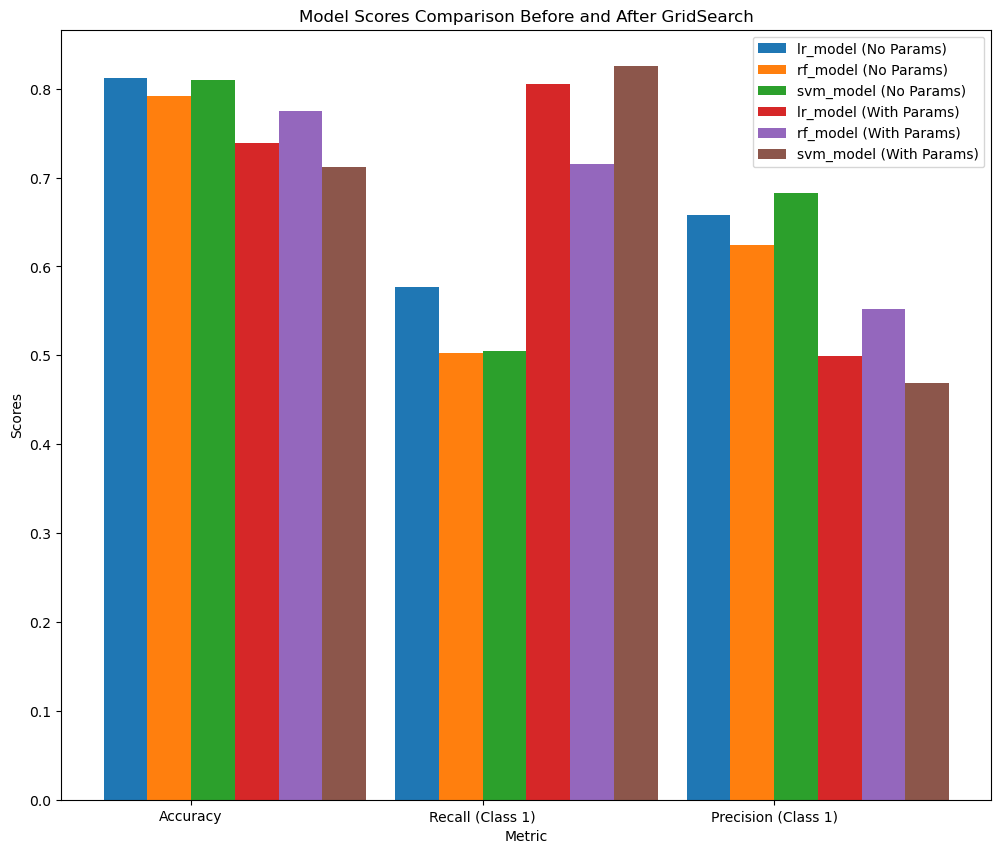

In [60]:

# Labels for the scores
labels = ['Accuracy', 'Recall (Class 1)', 'Precision (Class 1)']

# Number of groups and bar width
n_groups = 3
bar_width = 0.15 

# Creating figure and axis
fig, ax = plt.subplots(figsize=(12, 10))  

# Creating an index for each set of bars
index = np.arange(n_groups)

# Plotting each model's scores - no params
for i, (model, scores) in enumerate(models_no_param.items()):
    ax.bar(index + i * bar_width, scores, bar_width, label=f'{model} (No Params)')

# Plotting each model's scores - with params
for i, (model, scores) in enumerate(models_with_param.items()):
    ax.bar(index + i * bar_width + bar_width*len(models_no_param), scores, bar_width, label=f'{model} (With Params)')

# Adding labels, title, and legend
ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Model Scores Comparison Before and After GridSearch')
ax.set_xticks(index + bar_width * len(models_no_param) / 2)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()


# SMOTE

SMOTE, or Synthetic Minority Over-sampling Technique, is a method used to balance datasets in machine learning. It generates synthetic samples for the minority class, in this case, customers who have churned, to equalize the number of instances between classes. Using SMOTE helps in creating a more balanced dataset, which can improve the performance of classification algorithms and lead to more reliable predictions.

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
smote= SMOTE(random_state=42)

In [63]:
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train) #applying SMOTE only to the training data to avoid data leakage

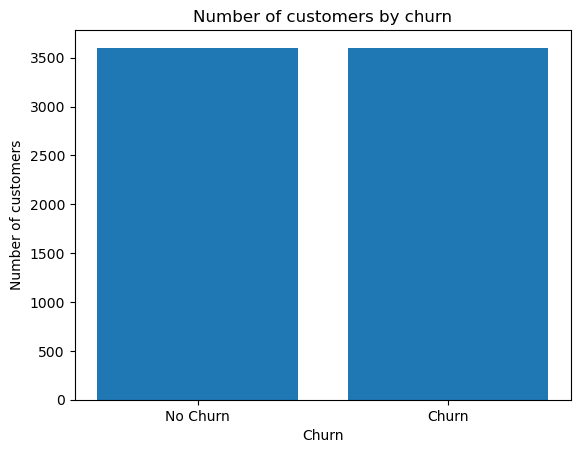

In [64]:
churn_counts = y_train_smote.value_counts()
plt.bar(churn_counts.index.astype(str), churn_counts.values)
plt.title('Number of customers by churn')
plt.xlabel('Churn')
plt.ylabel('Number of customers')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

In [65]:
#Creating a dictionary to store the models' results
models_smote={}

#### SMOTE x LG

In [66]:
lr_model_smote= LogisticRegression(max_iter=300)
lr_model_smote.fit(x_train_smote,y_train_smote)


LogisticRegression(max_iter=300)

In [67]:
prediction_lr_smote=lr_model_smote.predict(x_test_scaled)
report=classification_report(y_test,prediction_lr_smote)
print(report)
print('Accuracy (training data):',lr_model_smote.score(x_train_scaled,y_train))
print('Accuracy (test data):',lr_model_smote.score(x_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1561
           1       0.59      0.66      0.62       549

    accuracy                           0.79      2110
   macro avg       0.73      0.75      0.74      2110
weighted avg       0.80      0.79      0.79      2110

Accuracy (training data): 0.7917513206013815
Accuracy (test data): 0.7895734597156399


In [68]:
models_smote['lr_model']=[]
models_smote['lr_model'].append(lr_model_smote.score(x_test_scaled,y_test))
models_smote['lr_model'].append(recall_score(y_test,prediction_lr_smote))
models_smote['lr_model'].append(precision_score(y_test,prediction_lr_smote))

#### SMOTE x RF

In [69]:
rf_model_smote=RandomForestClassifier(random_state=42)
rf_model_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [70]:
prediction_rf_smote=rf_model_smote.predict(x_test_scaled)
report=classification_report(y_test,prediction_rf_smote)
print(report)
print('Accuracy (training data):',rf_model_smote.score(x_train_scaled,y_train))
print('Accuracy (test data):',rf_model_smote.score(x_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1561
           1       0.57      0.60      0.58       549

    accuracy                           0.78      2110
   macro avg       0.71      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

Accuracy (training data): 0.9965461194636327
Accuracy (test data): 0.7781990521327015


In [71]:
models_smote['rf_model']=[]
models_smote['rf_model'].append(rf_model_smote.score(x_test_scaled,y_test))
models_smote['rf_model'].append(recall_score(y_test,prediction_rf_smote))
models_smote['rf_model'].append(precision_score(y_test,prediction_rf_smote))

#### SMOTE x SVM

In [72]:
svm_model_smote=SVC(kernel='rbf', C=1,random_state=42)
svm_model_smote.fit(x_train_smote,y_train_smote)

SVC(C=1, random_state=42)

In [73]:
prediction_svm_smote=svm_model_smote.predict(x_test_scaled)
report=classification_report(y_test,prediction_svm_smote)
print(report)
print('Accuracy (training data):',svm_model_smote.score(x_train_scaled,y_train))
print('Accuracy (test data):',svm_model_smote.score(x_test_scaled,y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1561
           1       0.59      0.65      0.62       549

    accuracy                           0.79      2110
   macro avg       0.73      0.75      0.74      2110
weighted avg       0.80      0.79      0.79      2110

Accuracy (training data): 0.809833401056481
Accuracy (test data): 0.7914691943127962


In [74]:
models_smote['svm_model']=[]
models_smote['svm_model'].append(svm_model_smote.score(x_test_scaled,y_test))

models_smote['svm_model'].append(recall_score(y_test,prediction_svm_smote))
models_smote['svm_model'].append(precision_score(y_test,prediction_svm_smote))

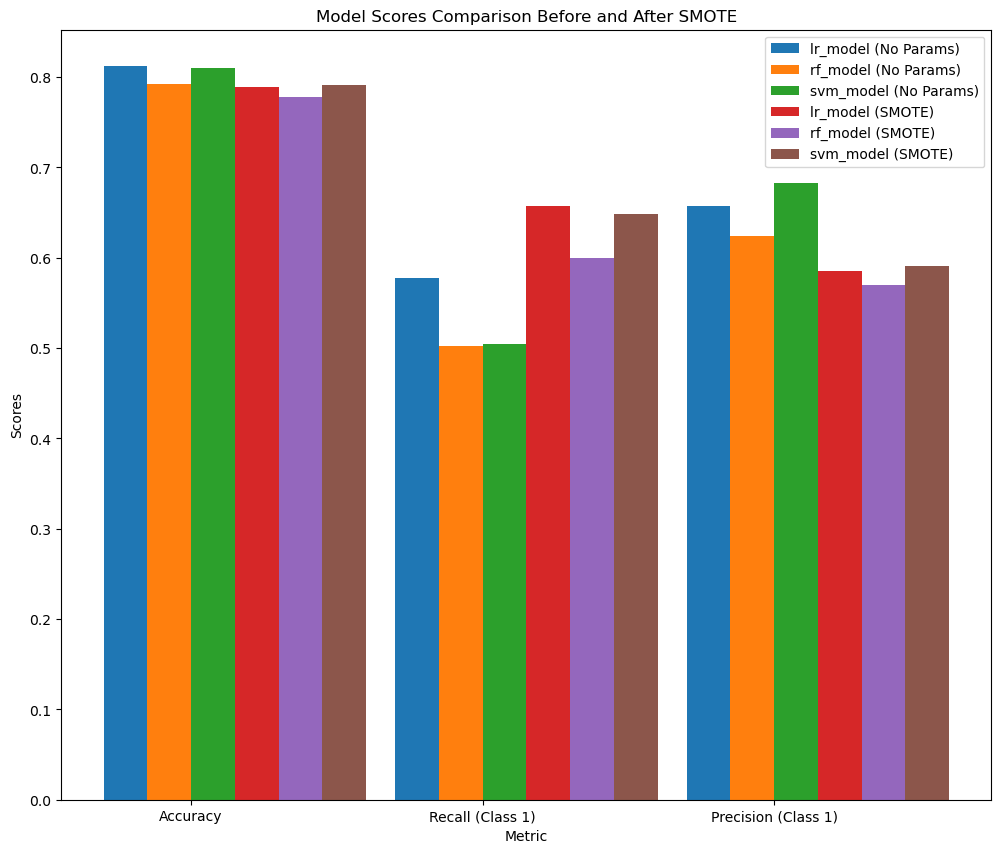

In [75]:

# Labels for the scores
labels = ['Accuracy', 'Recall (Class 1)','Precision (Class 1)']

# Number of groups and bar width
n_groups = 3
bar_width = 0.15 

# Creating figure and axis
fig, ax = plt.subplots(figsize=(12, 10))  

# Creating an index for each set of bars
index = np.arange(n_groups)

# Plotting each model's scores - no params
for i, (model, scores) in enumerate(models_no_param.items()):
    ax.bar(index + i * bar_width, scores, bar_width, label=f'{model} (No Params)')

# Plotting each model's scores - with params
for i, (model, scores) in enumerate(models_smote.items()):
    ax.bar(index + i * bar_width + bar_width*len(models_no_param), scores, bar_width, label=f'{model} (SMOTE)')

# Adding labels, title, and legend
ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Model Scores Comparison Before and After SMOTE')
ax.set_xticks(index + bar_width * len(models_no_param) / 2)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

All models show a slight decrease in accuracy after applying SMOTE. This could be because SMOTE makes the classes more balanced, which often leads to a lower accuracy when the original dataset is imbalanced. 

There is a significant increase in recall for Class 1 for all models after SMOTE is applied, with the svm_model showing the most substantial improvement. This indicates that after resampling, models are better at identifying the positive class. 

Precision seems to have decreased for the LR model and RF model after applying SMOTE, indicating more false positives are being predicted.

Once again there is the same trade-off between recall and precision. 

Now let's compare the SMOTE models with the fine-tuned ones:

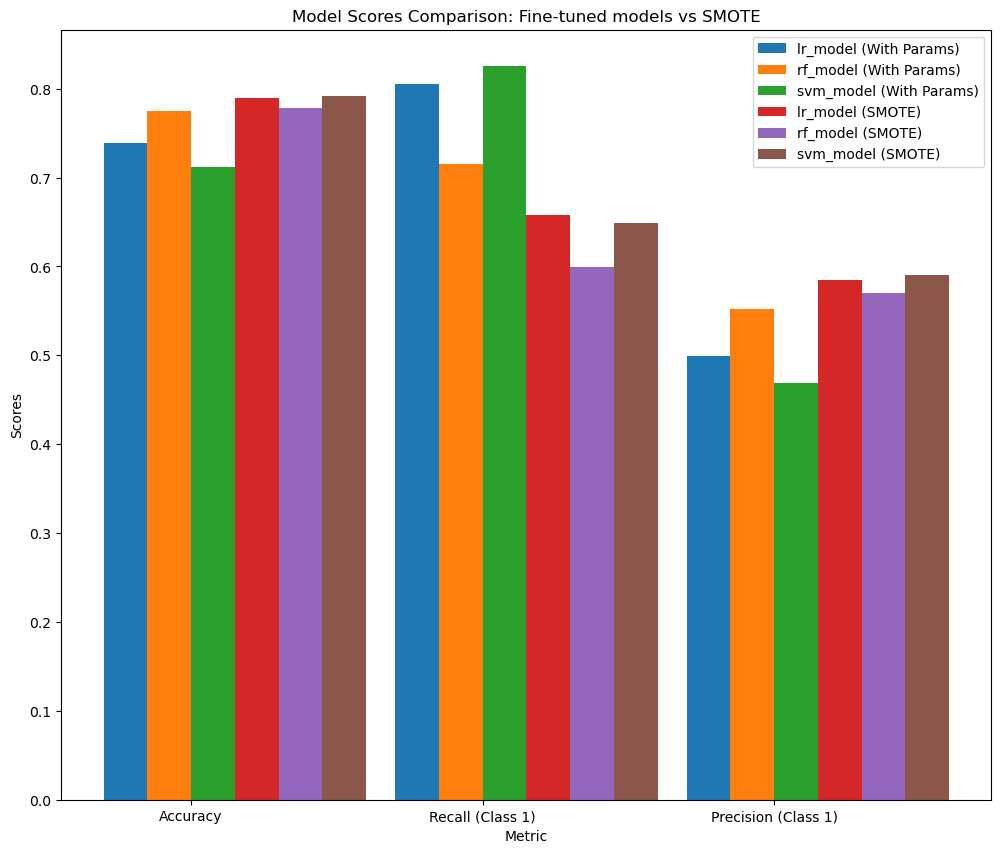

In [76]:

# Labels for the scores
labels = ['Accuracy', 'Recall (Class 1)','Precision (Class 1)']

# Number of groups and bar width
n_groups = 3
bar_width = 0.15 

# Creating figure and axis
fig, ax = plt.subplots(figsize=(12, 10))  

# Creating an index for each set of bars
index = np.arange(n_groups)

# Plotting each model's scores - no params
for i, (model, scores) in enumerate(models_with_param.items()):
    ax.bar(index + i * bar_width, scores, bar_width, label=f'{model} (With Params)')

# Plotting each model's scores - with params
for i, (model, scores) in enumerate(models_smote.items()):
    ax.bar(index + i * bar_width + bar_width*len(models_with_param), scores, bar_width, label=f'{model} (SMOTE)')

# Adding labels, title, and legend
ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Model Scores Comparison: Fine-tuned models vs SMOTE')
ax.set_xticks(index + bar_width * len(models_with_param) / 2)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

Models trained with SMOTE generally outperform the fine-tuned models in terms of accuracy. However, they differ notably in recall; the fine-tuned models tend to identify more instances of churn, meaning they have fewer instances where churn is present but not predicted. On the other hand, SMOTE models demonstrate improved precision, indicating they have fewer false positives – cases where churn is predicted but does not actually occur.

It's important to note that the SMOTE models haven't been fine-tuned for their parameters. If we apply parameter optimization, such as through a GridSearch, it's likely that the performance of SMOTE models could match or even surpass the fine-tuned models. Exploring this parameter optimization for SMOTE models could be a valuable next step to enhance model performance.

# Feature importances and bias analysis

In another Notebook (Model_Bias_and_Feature_Importance_Analysis.ipynb) I have performed a Feature importances and bias analysis. In order to shorten the amount of content in this notebook, I will only apply  the conclusions of the analysis* here:
 
##### Common Trends Across Models:

Tenure: All models seem to struggle with tenure, incorrectly predicting churn for newer customers (false positives) and missing churn predictions for long-standing customers (false negatives). This suggests a systemic issue across models, potentially due to overfitting to the majority class in the training data or inherent biases in the data collection process.

Total Charges: Lower total charges are consistently associated with false positives across models, indicating a possible perception that less invested customers are more likely to churn.

Contract Type: Month-to-month contracts are often associated with false positives, suggesting that models may overemphasize the volatility of such customers, while missing churn predictions for those on longer contracts.

##### Differences Across Models:

Monthly Charges: The Random Forest model shows some sensitivity to monthly charges with variable false positives in the higher range of monthly charges, while the SVM model's bias is showing for the middle range, suggesting it may treat this feature differently.

##### Implications for a Voting Classifier:

Given these observations, a voting classifier could potentially mitigate some of these biases by leveraging the diversity of predictions from each model. However, since some biases are common across all models (like the emphasis on tenure, total charges and month-to-month contracts), a voting classifier may not fully address these issues. It could, however, smooth out the variability seen in the interpretation of monthly charges.

Considering the common trends and differences across the Logistic Regression, Random Forest, and SVM models, it's apparent that creating a voting classifier might not be the most effective solution for improving churn prediction in this case. While a voting classifier can often capitalize on the diverse strengths of multiple models, the consistent biases related to tenure, total charges, and contract type suggest that these are systemic issues inherent to the data or the feature representation that wouldn't be resolved by simply combining model predictions.

In light of this, rather than combining models with shared biases, it would be more prudent to focus efforts on understanding the underlying reasons for these biases and to seek strategies that can directly mitigate them. This could involve acquiring more balanced datasets, employing different feature selection techniques, or exploring alternative modeling approaches that are less sensitive to the identified biases.

<b>*Note: you can still check the whole analysis as I have provided the file in the project. &#128513; </b>

# Summary and conclusion

#### What are the main clues that can help us identify customer churn?

Tenure: New customers are more likely to churn, as indicated by the high number of false positives in lower tenure groups across all models.

Total Charges: Customers with lower total charges tend to churn, suggested by consistent false positives across models.

Contract Type: Month-to-month contracts are frequently associated with churn, hinting at a perceived instability or commitment level.

#### Predicting and Preventing Churn:

The models were able to predict churn with varying degrees of accuracy. Using GridSearch for parameter optimization improved recall without significantly dropping accuracy.
SMOTE application generally increased recall, indicating better identification of churn cases, but also led to more false positives.
The trade-off between precision and recall is evident, emphasizing the business decision to prioritize one over the other based on cost implications.

Preventing customer churn can be approached by strategically addressing the identified key reasons for churn. Firstly, special attention should be given to newer customers, as they are more prone to churn. This can involve enhanced customer onboarding processes, providing personalized support, and offering introductory offers or discounts to increase their engagement and satisfaction. For customers with lower total charges, loyalty programs or tailored promotions could be implemented to enhance their perceived value and commitment to the service.

Additionally, customers on month-to-month contracts, who are shown to have a higher churn rate, could be targeted with incentives to switch to longer-term contracts, such as offering price reductions, exclusive benefits, or flexible terms that add value to longer commitments. 

Overall, a combination of personalized customer engagement strategies, value-added services, and a focus on building longer-term relationships can significantly contribute to reducing customer churn.

#### Problem Areas for Models:

- Systemic Issues: The consistent biases observed across models, especially regarding tenure and total charges, suggest that these are not just model-specific issues but are more deeply rooted in either the dataset or the feature representation.

- Voting Classifier Consideration: The idea of a voting classifier, while appealing for leveraging diverse predictions, may not be as effective given the shared biases across models. Instead, focusing on addressing these biases directly could yield better improvements in churn prediction.


#### Future Improvements:

- Fine-tuning parameters of SMOTE models could enhance their performance to match or surpass that of fine-tuned models without SMOTE.

- Data Handling: Acquiring more balanced data and employing different <b>feature selection techniques </b> might be crucial in addressing these biases. This could involve gathering more diverse data points or reevaluating the way features are encoded and used by the models.

- Alternative Approaches: Exploring modeling approaches that are less sensitive to identified biases or that can better handle imbalanced data could be beneficial. This might include more advanced ensemble techniques, different resampling methods, or even entirely different modeling paradigms.

- Deep Dive into Biases: A thorough investigation into why certain biases (e.g., lower tenure leading to churn prediction) are prevalent is necessary. This could reveal insights into customer behavior or data collection processes that might be influencing model predictions.


In conclusion, while the project successfully employed various techniques to predict churn, the key to future improvement lies in addressing the underlying biases and exploring alternative strategies for a more robust and accurate churn prediction model.